In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [174]:
# --- Load Data ---
df = pd.read_csv(r"C:\Users\Rand Sobczak Jr\_rts\mlops\mimiccds\real_mimic\output\predictions.csv")



In [175]:
# Drop columns not used for modeling
cols_to_drop = ['subject_id', 'y_pred', 'y_pred_proba', 'gender', 'anchor_age', 'race', 'age_group']
X = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
y = df['y_true'].astype(int)



In [176]:
# One-hot encode
X = pd.get_dummies(X)

# Remove target if accidentally retained
if 'y_true' in X.columns:
    X.drop(columns='y_true', inplace=True)



In [177]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)



In [181]:
# Train Model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [182]:
# --- Permutation Importance Analysis ---
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42
)


In [183]:
# Format into DataFrame
importances_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)


In [184]:
# Save results
importances_df.to_csv(r"C:\Users\Rand Sobczak Jr\_rts\mlops\mimiccds\real_mimic\output\permutation_importance.csv")

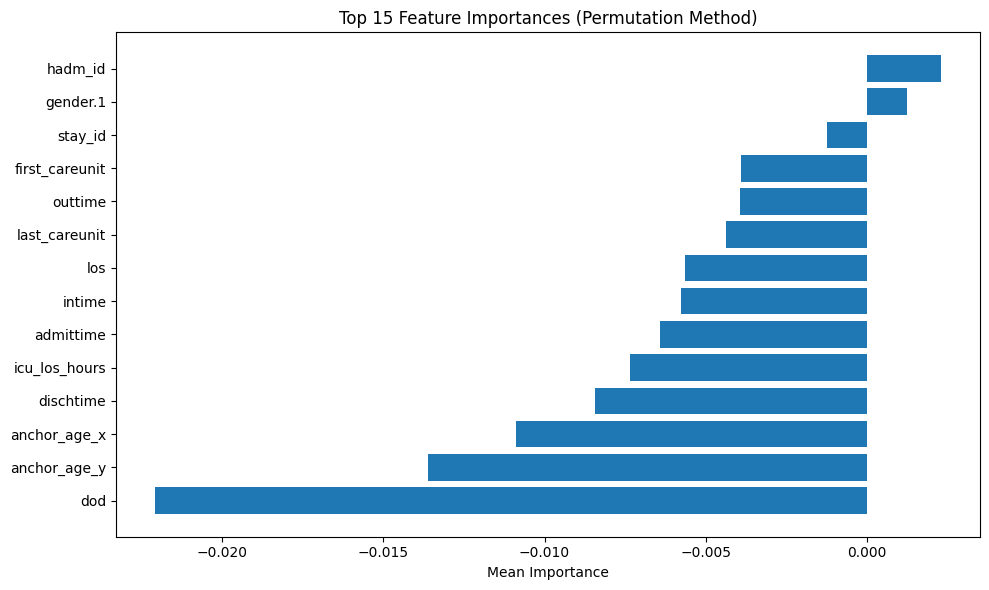

In [185]:
# Plot top 15 most important features
plt.figure(figsize=(10, 6))
plt.barh(importances_df.feature[:15][::-1], importances_df.importance_mean[:15][::-1])
plt.xlabel("Mean Importance")
plt.title("Top 15 Feature Importances (Permutation Method)")
plt.tight_layout()
plt.savefig("permutation_importance_top15.png", dpi=300)
plt.show()